# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Now let's hack the rotated CAPTCHA!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


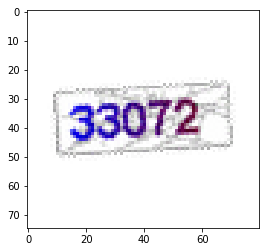

In [2]:
from hack_pca import hack_pca

# Hack different images yourself
img = hack_pca('1.gif')
plt.imshow(img, cmap="gray")



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


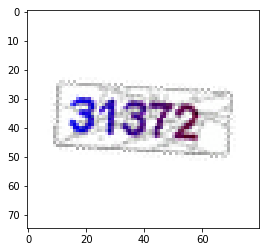

In [3]:
img = hack_pca('2.gif')
plt.imshow(img, cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


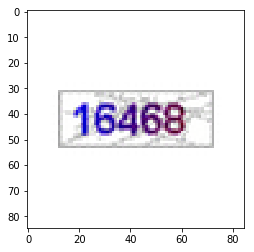

In [4]:
img = hack_pca('3.gif')
plt.imshow(img, cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


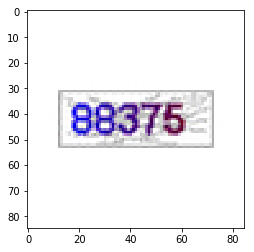

In [5]:
img = hack_pca('4.gif')
plt.imshow(img, cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


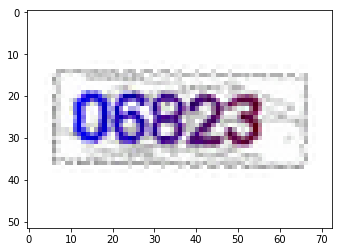

In [6]:
img = hack_pca('5.gif')
plt.imshow(img, cmap="gray")

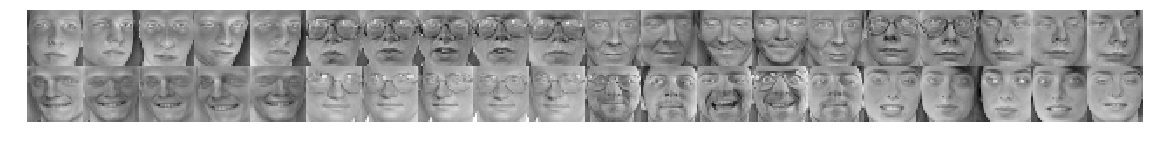

In [7]:
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
# YOUR CODE HERE
# 1. Feature preprocessing
# begin answer
fea_Train_mean = np.mean(fea_Train, axis=0)
fea_Train = fea_Train - fea_Train_mean
fea_Test_mean = np.mean(fea_Test, axis=0)
fea_Test = fea_Test - fea_Test_mean
# end answer
from show_face import show_face
show_face(fea_Train)

/home/msc/homework/ml2018winter_hw4/pca/show_face.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  = fea[i * numPerLine + j, :].reshape((faceH, faceW)).transpose()


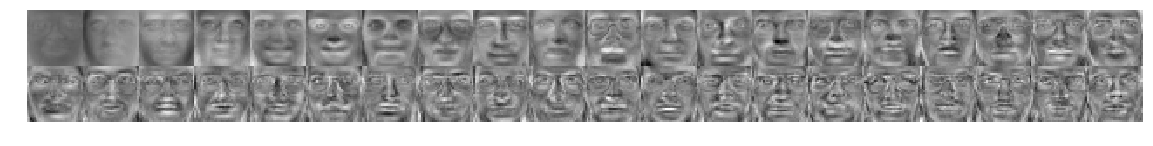

In [8]:
# 2. Run PCA
# begin answer
from pca import PCA
eigvectors, _ = PCA(fea_Train)
# end answer
# 3. Visualize eigenface
# begin answer
show_face(eigvectors.T)
# end answer

When low dimensional number is 8, accuracy is 0.745


/home/msc/homework/ml2018winter_hw4/pca/show_face.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  = fea[i * numPerLine + j, :].reshape((faceH, faceW)).transpose()


When low dimensional number is 16, accuracy is 0.825
When low dimensional number is 32, accuracy is 0.845
When low dimensional number is 64, accuracy is 0.865
When low dimensional number is 128, accuracy is 0.865


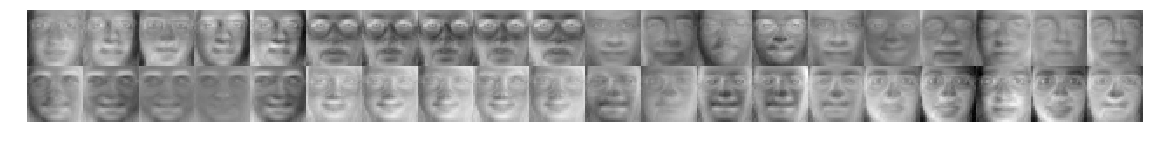

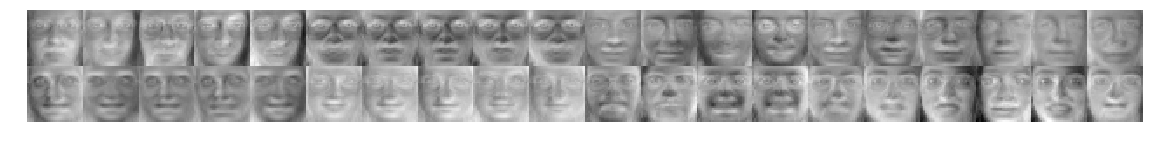

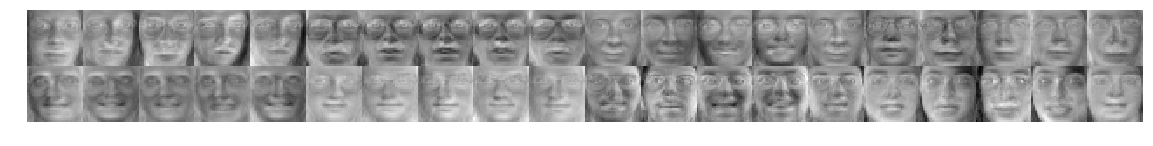

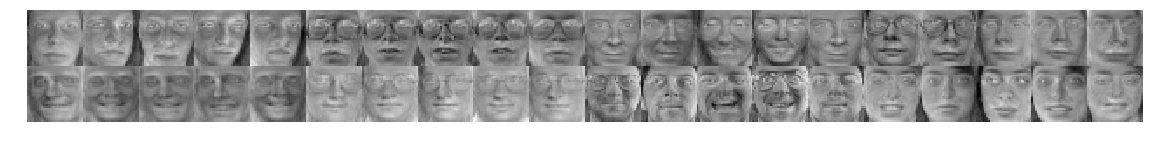

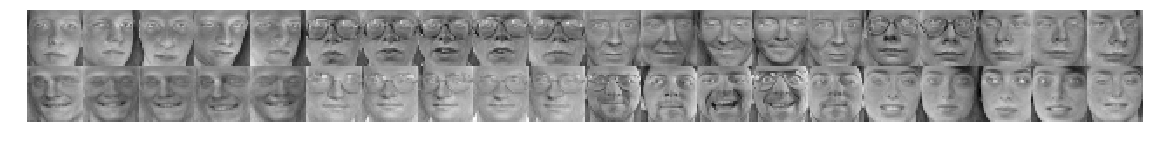

In [9]:
from pca import PCA
from knn import knn
eigvectors, _ = PCA(fea_Train)
low_dimensions_set = [8, 16, 32, 64, 128]
for l in low_dimensions_set:
# 4. Project data on to low dimensional space
# begin answer
    vec = eigvectors[:, 0:l]
    fea_Train_low_dimentions = np.matmul(fea_Train, vec)
    fea_Test_low_dimentions = np.matmul(fea_Test, vec)
# end answer
# 5. Run KNN in low dimensional space
# begin answer
    prediction =  knn(fea_Test_low_dimentions, fea_Train_low_dimentions, gnd_Train, k=1).reshape(-1)
    accuracy  = np.where(gnd_Test == prediction)[0].shape[0] / len(gnd_Test)
    print("When low dimensional number is {}, accuracy is {}".format(l, accuracy))
# end answer
# 6. Recover face images form low dimensional space, visualize them
# begin answer
    fea_train_low_dimentions_visualize = np.matmul(fea_Train_low_dimentions, vec.T)
    show_face(fea_train_low_dimentions_visualize)
# end answer  

## You are encouraged to apply LDA on this dataset!

In [10]:
from LDA import LDA

# Your code here
# begin answer
eigvectors_LDA, _ = LDA(fea_Train, gnd_Train)
fea_Train_low_dimentions_LDA = np.matmul(fea_Train, eigvectors_LDA)
fea_Test_low_dimentions_LDA = np.matmul(fea_Test, eigvectors_LDA)
prediction_LDA =  knn(fea_Test_low_dimentions_LDA, fea_Train_low_dimentions_LDA, gnd_Train, k=1).reshape(-1)
accuracy_LDA  = np.where(gnd_Test == prediction_LDA)[0].shape[0] / len(gnd_Test)
print("When using LDA methond, accuracy is {}".format(accuracy_LDA))
# end answer

When using LDA methond, accuracy is 0.97
